In [1]:
import gseapy as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from collections import Counter

In [16]:
human_sets = gp.get_library_name('Human')
#gene_df = pd.read_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/gene_embs/dev_model/F4/Mesenchyme1/oex_100/oex_dists_combined_3_class.csv',index_col=0)
gene_df = pd.read_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/avg_embs_vs_cnot1/dev_model/combined_sorted_dists.csv',index_col=0)
genes_by_euc_dist = gene_df.sort_values(by='euclidean_distance')['gene']


In [17]:
gene_sets = ['Reactome_2022','KEGG_2021_Human', 'GO_Molecular_Function_2023', 'GO_Cellular_Component_2023', 'GO_Biological_Process_2023']

In [18]:
objects = []
with (open("/mnt/scratchc/ghlab/Geneformer/geneformer/gene_name_id_dict.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
            
def get_key_by_value(dictionary, value):
    for key, val in dictionary.items():
        if val == value:
            return key
    return None


In [19]:
gene_symbols_by_euc_dist = [get_key_by_value(objects[0],gene) for gene in genes_by_euc_dist]

In [20]:
gene_symbols_by_euc_dist =[gene for gene in gene_symbols_by_euc_dist if gene is not None]

In [24]:
# Run GSEA analysis
results = gp.enrichr(gene_list=gene_symbols_by_euc_dist, gene_sets=gene_sets, organism='Human')


In [25]:
print(results.results)

                        Gene_set  \
0                  Reactome_2022   
1                  Reactome_2022   
2                  Reactome_2022   
3                  Reactome_2022   
4                  Reactome_2022   
...                          ...   
9142  GO_Biological_Process_2023   
9143  GO_Biological_Process_2023   
9144  GO_Biological_Process_2023   
9145  GO_Biological_Process_2023   
9146  GO_Biological_Process_2023   

                                                   Term    Overlap  \
0                      Signal Transduction R-HSA-162582  1616/2465   
1                                 Disease R-HSA-1643685  1082/1736   
2                              Metabolism R-HSA-1430728  1255/2049   
3                            Immune System R-HSA-168256  1179/1943   
4     Signaling By Rho GTPases, Miro GTPases And RHO...    446/660   
...                                                 ...        ...   
9142           Sensory Perception Of Smell (GO:0007608)     29/230   
9143  D

In [26]:
gsea_results = results.results
reactome = gsea_results[gsea_results['Gene_set'] == 'Reactome_2022']
kegg = gsea_results[gsea_results['Gene_set'] == 'KEGG_2021_Human']
GO_MF = gsea_results[gsea_results['Gene_set'] == 'GO_Molecular_Function_2023']
GO_CC = gsea_results[gsea_results['Gene_set'] == 'GO_Cellular_Component_2023']
GO_BP = gsea_results[gsea_results['Gene_set'] == 'GO_Biological_Process_2023']

In [27]:
reactome.to_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/in_silico_pt_embs/dev_model/gsea/reactome_gsea.csv')
kegg.to_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/in_silico_pt_embs/dev_model/gsea/molecular_function_go_gsea.csv')
GO_CC.to_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/in_silico_pt_embs/dev_model/gsea/cellular_component_go_gsea.csv')
GO_BP.to_csv('/mnt/scratchc/ghlab/in_silico_perturb_data/in_silico_pt_embs/dev_model/gsea/biological_process_go_gsea.csv')

In [28]:
gsea_results.sort_values(by='Combined Score', ascending=False)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
3977,GO_Biological_Process_2023,Regulation Of Cell Cycle Checkpoint (GO:1901976),11/11,0.000642,0.014956,0,0,107195.000000,7.879128e+05,BARD1;ETAA1;DEPDC1B;RAD51;FEM1B;RFWD3;CRY1;RPA...
3976,GO_Biological_Process_2023,Negative Regulation Of Cellular Response To Va...,11/11,0.000642,0.014956,0,0,107195.000000,7.879128e+05,CADM4;SEMA6A;ATP2B4;DAB2IP;SORD;IL12B;SPRY2;IL...
2194,GO_Molecular_Function_2023,ABC-type Xenobiotic Transporter Activity (GO:0...,10/10,0.001253,0.024220,0,0,97450.000000,6.511443e+05,ABCC3;ABCC1;ABCB1;ABCC2;ABCC5;ABCA8;ABCB11;ABC...
4034,GO_Biological_Process_2023,Positive Regulation Of Transforming Growth Fac...,10/10,0.001253,0.023335,0,0,97450.000000,6.511443e+05,TNXB;SERPINF2;GATA6;XCL1;LGALS9;CD46;PTGS2;THB...
3334,GO_Cellular_Component_2023,Nuclear Inclusion Body (GO:0042405),10/10,0.001253,0.009687,0,0,97450.000000,6.511443e+05,RANBP2;ATXN3;SLF1;PABPN1;TPR;NUP153;STUB1;NBN;...
...,...,...,...,...,...,...,...,...,...,...
9142,GO_Biological_Process_2023,Sensory Perception Of Smell (GO:0007608),29/230,0.999994,0.999995,0,0,0.134656,7.912701e-07,OR5M9;OR2C1;SLC24A4;OR8K1;OR13J1;OR5I1;OR13H1;...
3275,GO_Molecular_Function_2023,Olfactory Receptor Activity (GO:0004984),40/362,0.999993,0.999993,0,0,0.114592,7.601042e-07,OR7G2;OR7A10;OR5M9;OR9K2;OR2C1;OR8K1;OR1E2;OR1...
9143,GO_Biological_Process_2023,Detection Of Chemical Stimulus Involved In Sen...,17/141,0.999995,0.999995,0,0,0.128835,6.581461e-07,OR2B2;OR2C1;SLC24A4;OR13J1;OR13H1;OR10G3;OR1L6...
9144,GO_Biological_Process_2023,Detection Of Chemical Stimulus Involved In Sen...,16/139,0.999995,0.999995,0,0,0.122243,6.218215e-07,OR2B2;OR2C1;SLC24A4;OR13J1;OR13H1;OR10G3;OR1L6...


/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


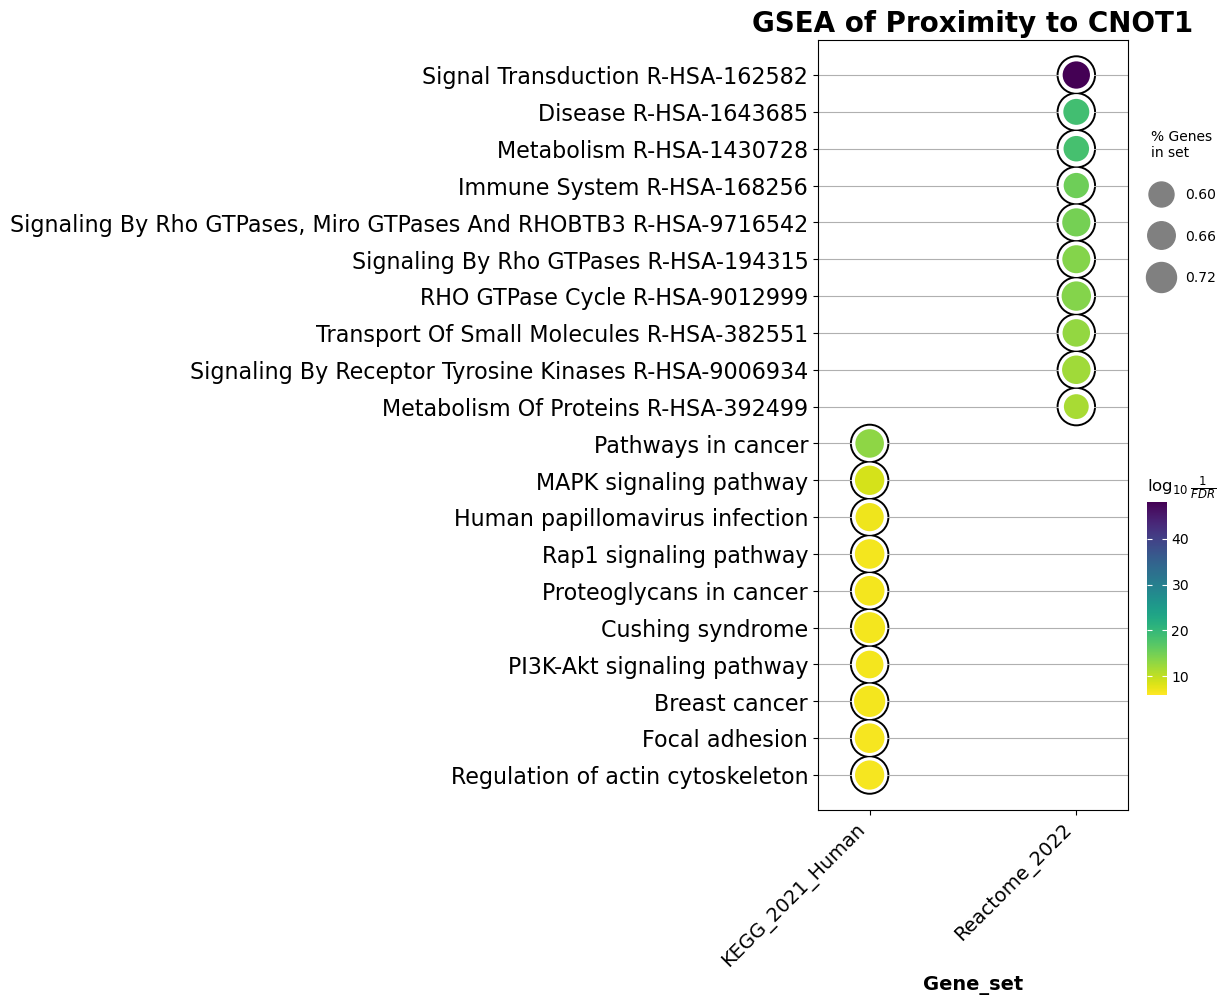

In [29]:
ax = gp.dotplot(pd.concat([kegg,reactome],axis=0),
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=5,
              top_term=10,
              figsize=(5,10),
              title = "GSEA of Proximity to CNOT1",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


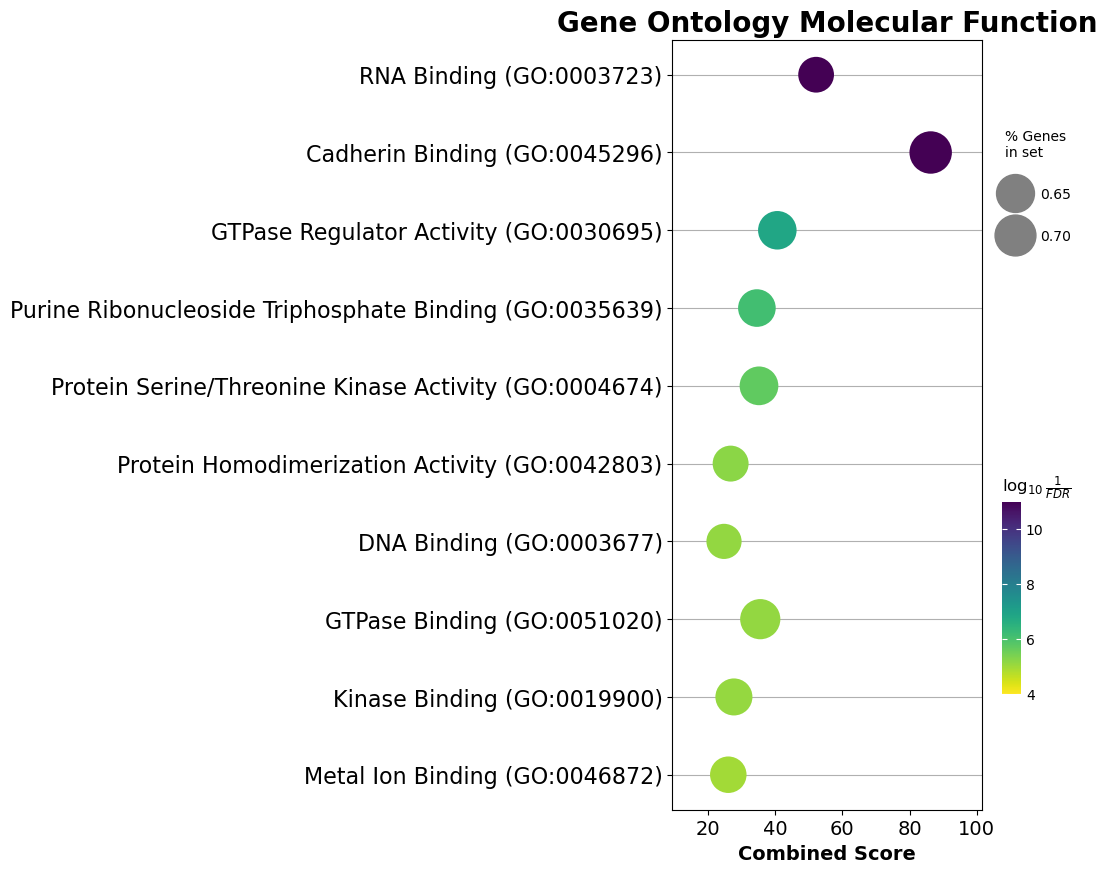

In [33]:
ax = gp.dotplot(GO_MF, title='Gene Ontology Molecular Function',cmap='viridis_r', size=7, figsize=(5,10))

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


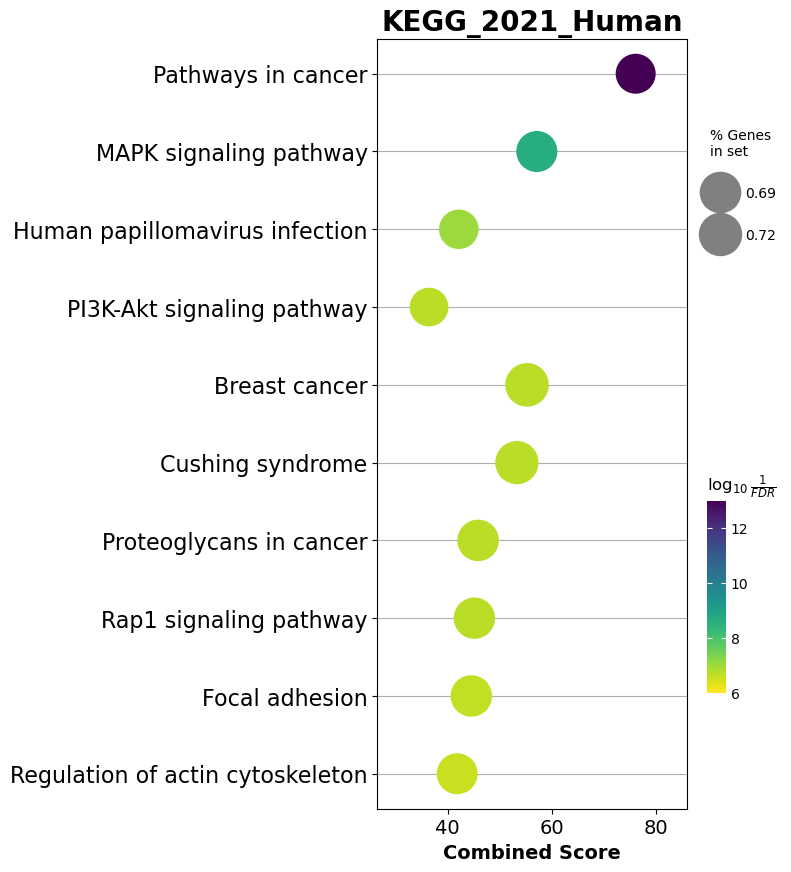

In [32]:
ax = gp.dotplot(kegg, title='KEGG_2021_Human',cmap='viridis_r', size=7, figsize=(5,10))

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


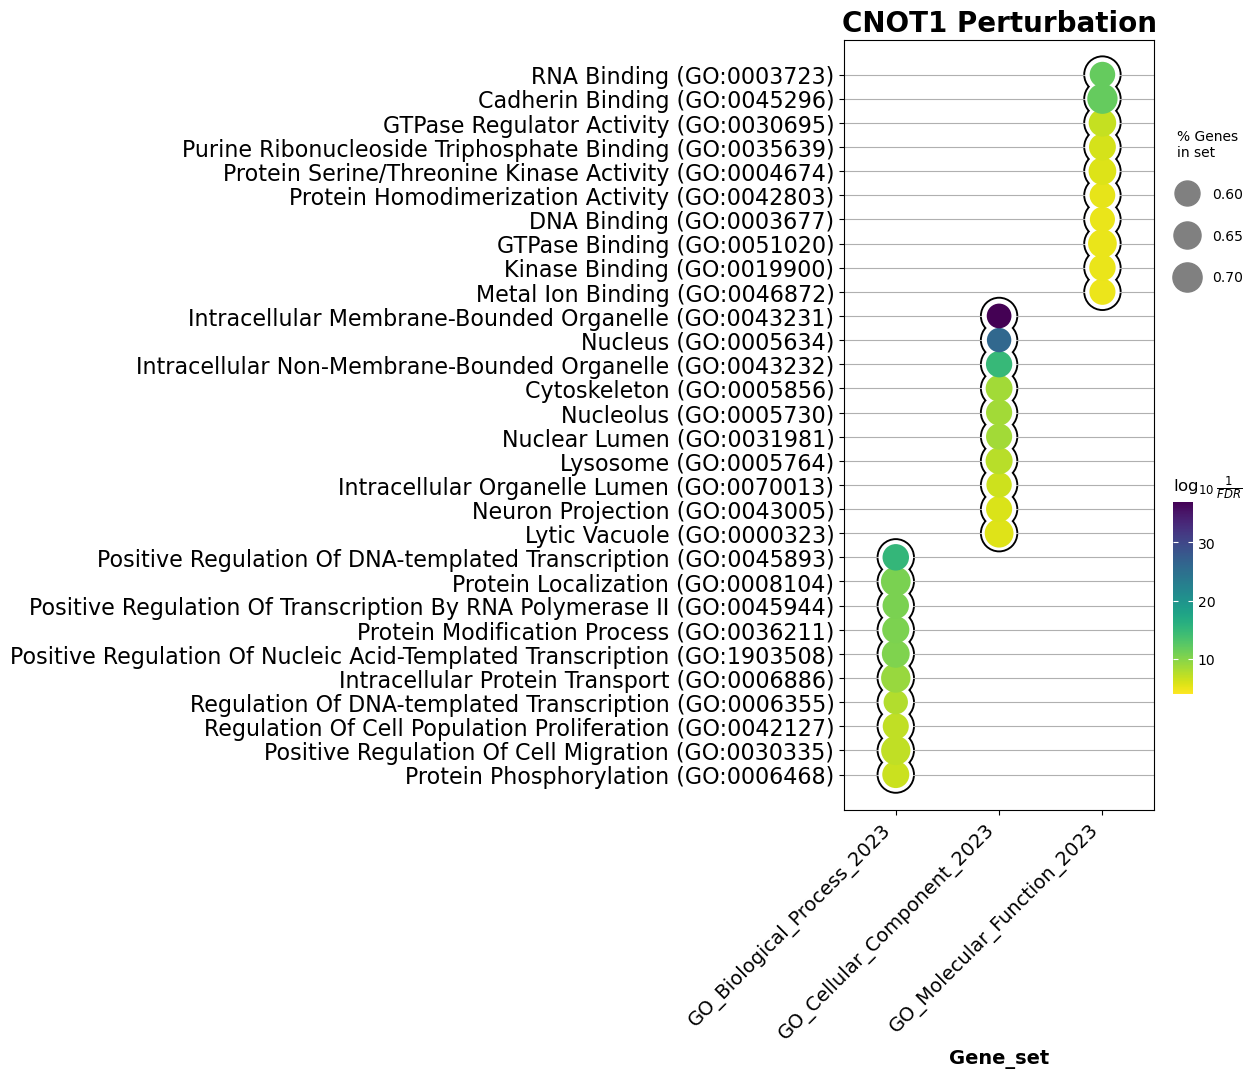

In [31]:
ax = gp.dotplot(pd.concat([GO_MF,GO_CC,GO_BP],axis=0),
              column="Adjusted P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=5,
              top_term=10,
              figsize=(5,10),
              title = "CNOT1 Perturbation",
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o',
             )

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/gseapy/plot.py:689: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df[self.colname].replace(


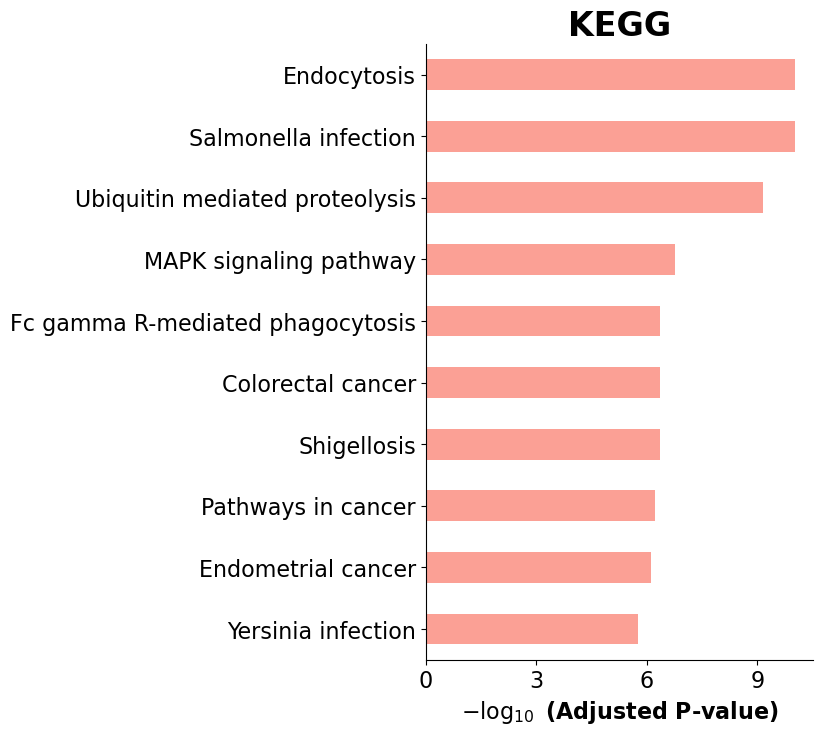

In [57]:
ax = gp.barplot(kegg,
              column="Adjusted P-value",
              #group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(5,8),
              title='KEGG'
              #color=['darkred', 'darkblue'] # set colors for group
             )